# Create SST profile and buiyancy forcing fields, and save them in directory INPUT/ as a nc file
 - Used to run MOM6 as one of the initial conditions.
 - Wind forcing is independent of type of vertical coordinate.


For the model, specify the following in the MOM_input file:

SSTRESTORE_FILE = "forcingSST.nc" ! The file with the SST toward which to restore in the variable given by \
                                ! SST_RESTORE_VAR. \
SST_RESTORE_VAR = "SST"         ! default = "SST" \
                                ! The variable with the SST toward which to restore. \

In [2]:
clear
homedir = getenv('HOME');
workdir = getenv('WORK');
scradir = getenv('SCRATCH');
addpath(genpath([homedir '/work_MOM']));
addpath(genpath([homedir '/mytoolbox']));
addpath(genpath([homedir '/MyFuncs']));
which build_grid_MOM

/glade/u/home/yueyanglu/work_MOM/func/build_grid_MOM.m


In [17]:
% 2. create
% delda_m = 200; % m
% [nih,njh] = deal(100,50); %2000x1000
% xlim = [0 delda_m*nih/1e3]; % km
% ylim = [0 delda_m*njh/1e3];
delda_m = 2000; % [m] grid spacing
xlim = [0 400]; % km
ylim = [0 200];
[nih, njh] = deal((xlim(2)-xlim(1))*1e3/delda_m, (ylim(2)-ylim(1))*1e3/delda_m);

grid = build_grid_MOM(nih,njh,xlim,ylim);

## create sin-wave-like profile (zonally uniform)

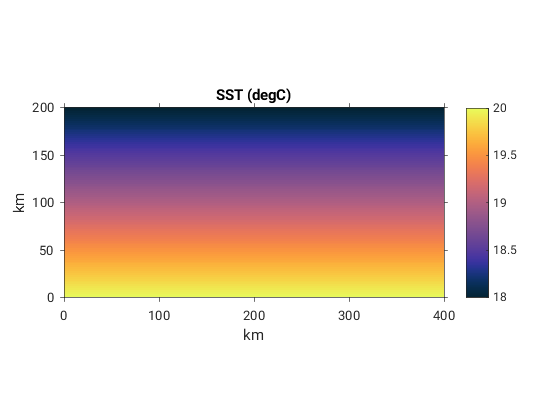

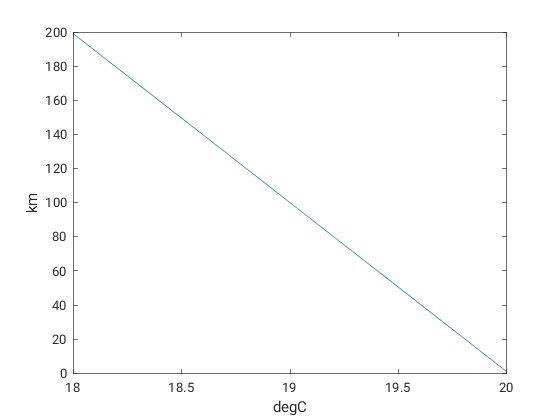

In [18]:
% c0 = 20; % [degC]
% iw_y = 3/41;
% SST = c0*cos(2*pi*iw_y* (grid.geolat - grid.geolat(:,1))/grid.Ly);
Ts_top = 20;
Tn_top = 18;
Ly_p = grid.geolat(1,end) - grid.geolat(1,1);
SST = Ts_top*(grid.geolat(:,end) - grid.geolat)/Ly_p + Tn_top*(grid.geolat-grid.geolat(:,1))/Ly_p;

figure
imagescn(grid.lonh, grid.lath, SST'); 
axis equal;
set(gca,'tickdir','out','ylim',grid.latq([1 end]));
cmocean('thermal'); colorbar;
title('SST (degC)')
xlabel('km')
ylabel('km')

figure
plot(SST(22,:),grid.lath)
xlabel('degC')
ylabel('km')
% grid.geolat(:,end) - grid.geolat

## create fields

In [19]:

[x, y] = deal(grid.lonh, grid.lath);
% other fields
[evap, LW, SW, sensible, latent, liq_precip, froz_precip, liq_runoff, froz_runoff, SSS] = deal(0*SST);

## save the reference SST

In [20]:

savefnm = 'INPUT_2km_x400kmy200km/forcingBUOY.nc';
% coordinates
ncbuild(savefnm, x, 'dimnames', {'xh'}, ...
    'varatts', {'long_name', 'longitude at cell centers', 'units', 'km'});
ncbuild(savefnm, y, 'dimnames', {'yh'}, ...
    'varatts', {'long_name', 'latitude at cell centers', 'units', 'km'});
ncbuild(savefnm, 1, 'name', 'Time', 'dimnames', {'Time'}, 'unlimited', {'Time'} );
% vars for thermal
ncbuild(savefnm, SST, 'name', 'SST', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'Reference surface SST', 'units', 'Celsius'});
ncbuild(savefnm,  LW, 'name', 'LW', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'Longwave flux downward', 'units', 'W/m^2'});
ncbuild(savefnm,  SW, 'name', 'SW', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'Shortwave flux downward', 'units', 'W/m^2'});
ncbuild(savefnm, sensible, 'name', 'sensible', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'Sensible flux into ocean', 'units', 'W/m^2'});
ncbuild(savefnm, latent, 'name', 'latent', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'latent flux into ocean', 'units', 'W/m^2'});
% vars for salinity
ncbuild(savefnm, evap, 'name', 'evap', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'Salt flux forcing = evaporation (both negative)', 'units', 'kg/(m^2*s)'});
ncbuild(savefnm, liq_precip, 'name', 'liq_precip', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'Liquid precipitation into ocean', 'units', 'kg/(m^2*s)'});
ncbuild(savefnm, froz_precip, 'name', 'froz_precip', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'Frozen precipitation into ocean', 'units', 'kg/(m^2*s)'});
ncbuild(savefnm, liq_runoff, 'name', 'liq_runoff', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'Liquid runoff into ocean', 'units', 'kg/(m^2*s)'});
ncbuild(savefnm, froz_runoff, 'name', 'froz_runoff', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'Frozen runoff into ocean', 'units', 'kg/(m^2*s)'});
ncbuild(savefnm, SSS, 'name', 'SSS', 'dimnames', {'xh','yh','Time'}, ...
    'varatts', {'long_name', 'Reference surface SSS', 'units', 'psu'});

ncdisp(savefnm)

Source:
           /glade/u/home/yueyanglu/work_mlmodel/INPUT_2km_x400kmy200km/forcingBUOY.nc
Format:
           classic
Dimensions:
           xh   = 200
           yh   = 100
           Time = 1     (UNLIMITED)
Variables:
    x          
           Size:       200x1
           Dimensions: xh
           Datatype:   double
           Attributes:
                       long_name = 'longitude at cell centers'
                       units     = 'km'
    y          
           Size:       100x1
           Dimensions: yh
           Datatype:   double
           Attributes:
                       long_name = 'latitude at cell centers'
                       units     = 'km'
    Time       
           Size:       1x1
           Dimensions: Time
           Datatype:   double
    SST        
           Size:       200x100x1
           Dimensions: xh,yh,Time
           Datatype:   double
           Attributes:
                       long_name = 'Reference surface SST'
                       unit